<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

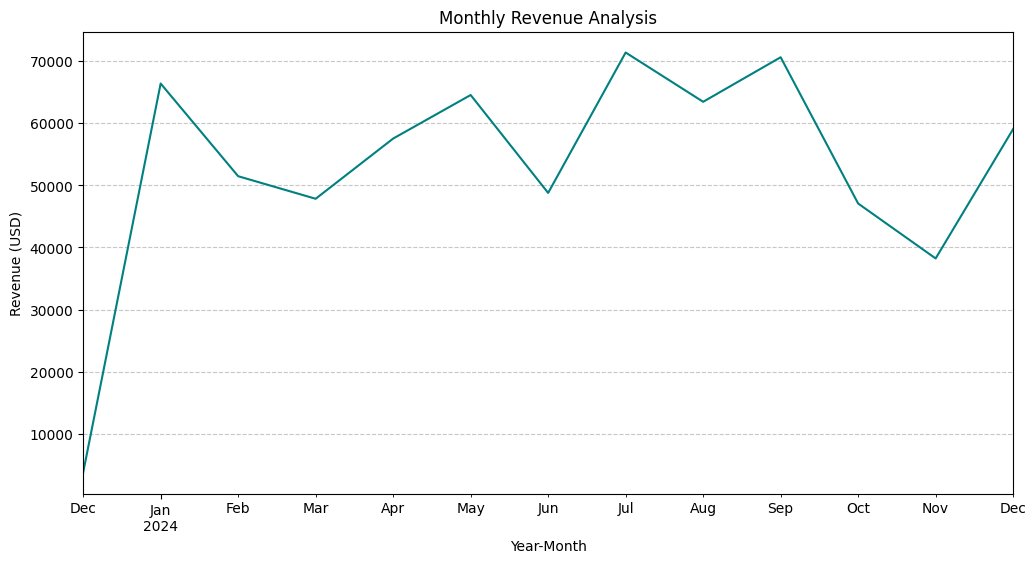

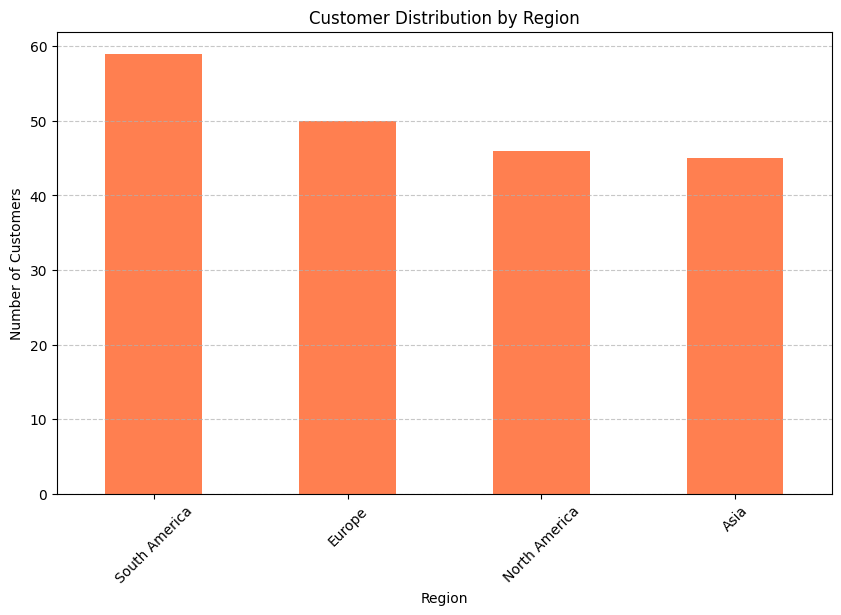

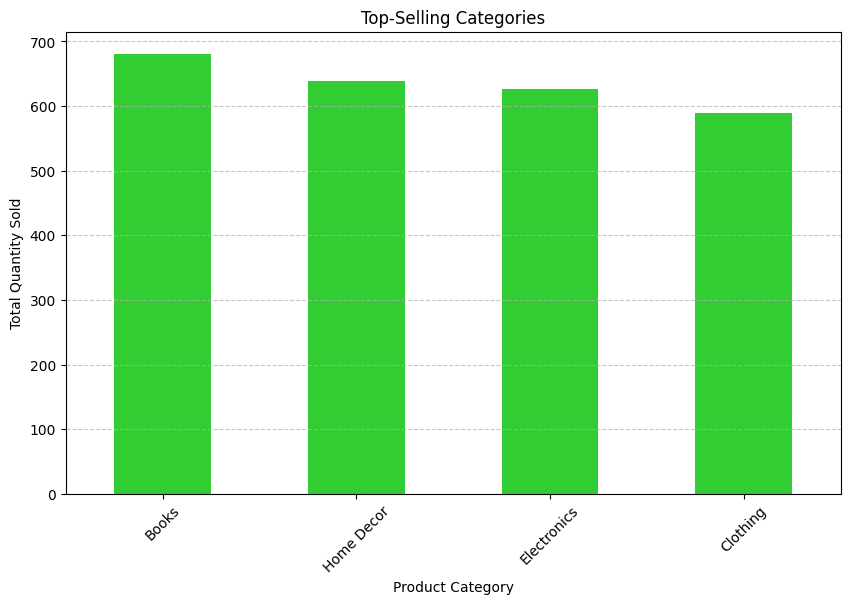

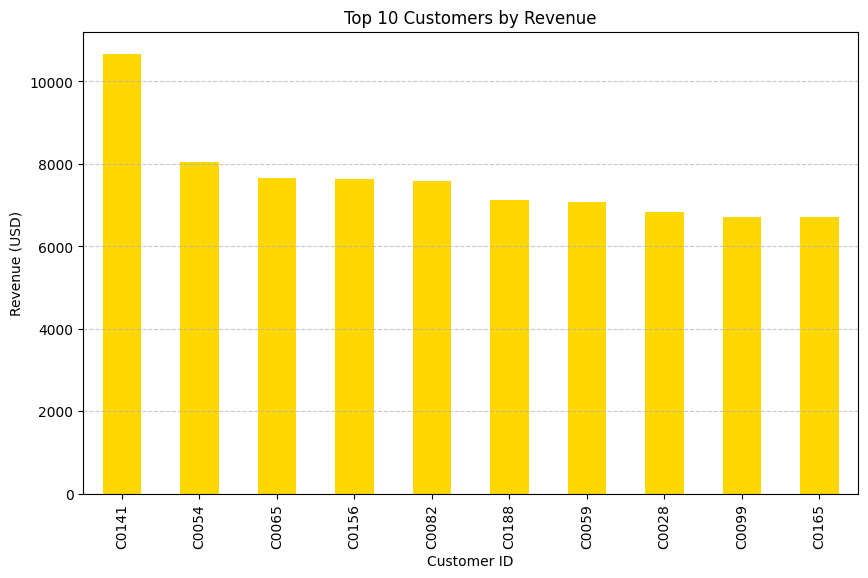

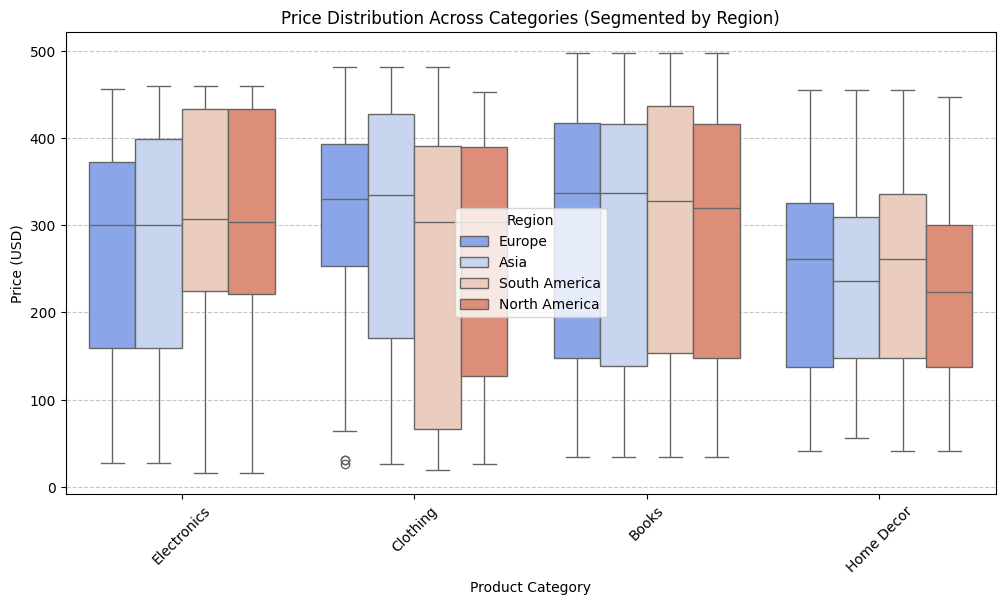

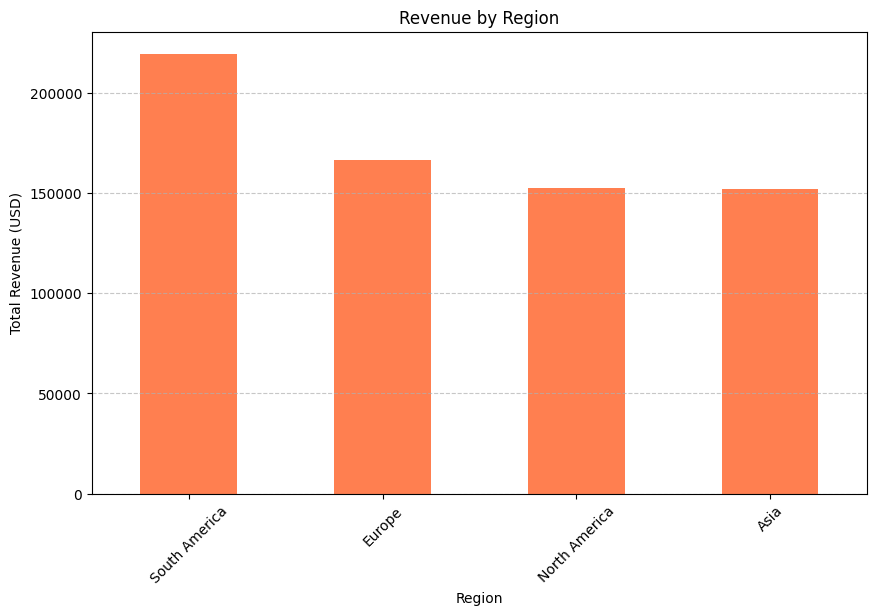

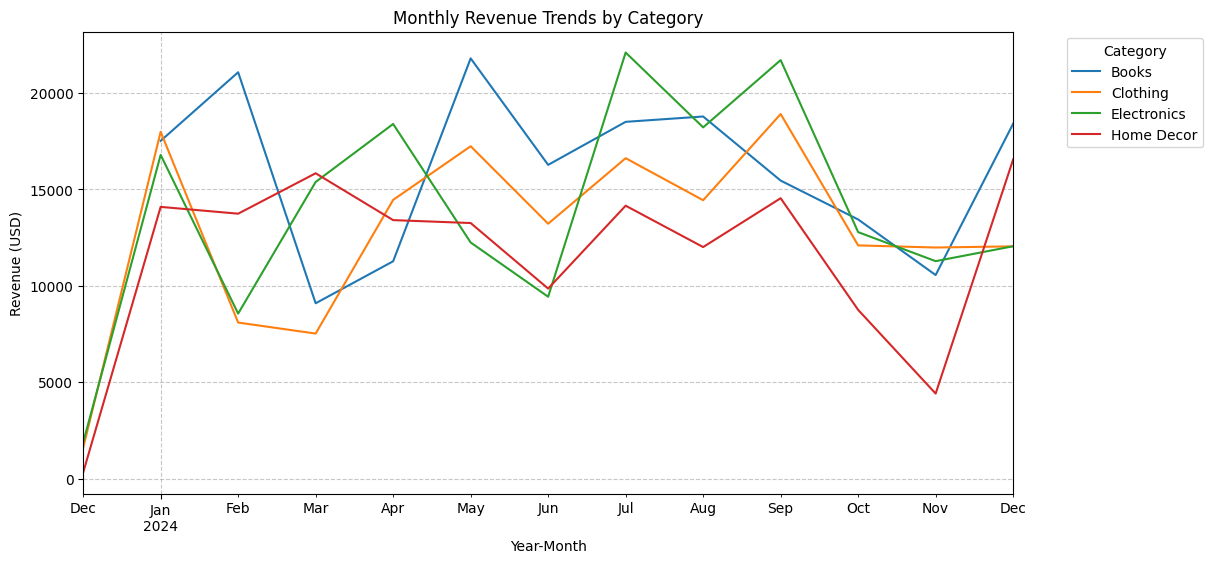

In [24]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 3: Inspect the Data
print(customers.info())
print(products.info())
print(transactions.info())

# Preview data
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())

# Step 4: Merge the DataFrames
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Convert dates to datetime
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Step 5: Perform EDA

## 5.1 Monthly Revenue Analysis
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', color='teal', title='Monthly Revenue Analysis')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year-Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.2 Customer Distribution by Region
customer_regions = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
customer_regions.plot(kind='bar', color='coral', title='Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.3 Best-Selling Categories
category_performance = merged_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_performance.plot(kind='bar', color='limegreen', title='Top-Selling Categories')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.4 High-Value Customers
revenue_per_customer = merged_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
revenue_per_customer.plot(kind='bar', color='gold', title='Top 10 Customers by Revenue')
plt.ylabel('Revenue (USD)')
plt.xlabel('Customer ID')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Rename columns in Products and Transactions
products.rename(columns={'Price': 'ProductPrice'}, inplace=True)
transactions.rename(columns={'Price': 'TransactionPrice'}, inplace=True)

# Merge DataFrames
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Convert dates to datetime
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])


# Price Distribution by Category with Region as hue
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Category', y='ProductPrice', hue='Region', palette='coolwarm')
plt.title('Price Distribution Across Categories (Segmented by Region)')
plt.ylabel('Price (USD)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Region')
plt.show()

# Revenue by Region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='coral', title='Revenue by Region')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ensure TransactionDate is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')

# Create YearMonth column
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Transaction Trends by Product Category
category_trends = merged_df.groupby(['Category', 'YearMonth'])['TotalValue'].sum().unstack()
category_trends.T.plot(figsize=(12, 6), title='Monthly Revenue Trends by Category')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year-Month')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Step 6: Save the Updated Insights to a File
insights = """
Business Insights:
1. Monthly revenue peaks during holiday seasons, particularly in December and January, indicating an opportunity for seasonal campaigns.
2. Electronics and Books dominate sales volume, while niche categories like Home Decor could grow with targeted promotions.
3. The South American region hosts the largest customer base, yet North America contributes disproportionately higher revenue per customer.
4. Most product sales occur within a price range of $125-$375, representing a balance between affordability and profitability.
5. The top 10 customers account for a significant share of revenue, suggesting the value of loyalty incentives and exclusive offers.
"""
with open('Business_Insights.txt', 'w') as file:
    file.write(insights)
